In [7]:
%cd ~

C:\Users\Akileshvar A Mosi


In [139]:
import math
import numpy as np
import pandas as pd
import random
import seaborn as sns

In [9]:
dataDF = pd.read_csv('Documents/Project/MarketStudy/Data/5yearstop10.csv')
data = np.array(dataDF)

In [12]:
data.shape

(1229, 10)

In [2]:
def update_average(old_avg, count, new_reward):
     return ((old_avg * (count - 1)) + new_reward) / count

In [3]:
def update_confidence(average, count, pull_count):
     return average + ((2 * math.log(pull_count + 1)) / count) 

In [150]:
def GreedyBandit(n_arms, allowed_pulls):
    amt = 100000
    pa = list()
    sa = list()
    avg_rew = [0] * n_arms
    count = [0] * n_arms
    for i in range(allowed_pulls):
        if i < n_arms:
            arm = i
        else:
            arm = avg_rew.index(max(avg_rew))
        count[arm] += 1
        rew = data[i,arm]
        amt += (rew/100) * amt
        pa.append(amt)
        sa.append(arm)
        avg_rew[arm] = update_average(avg_rew[arm], count[arm], rew)
    return dict(zip(avg_rew,count)),pa,sa

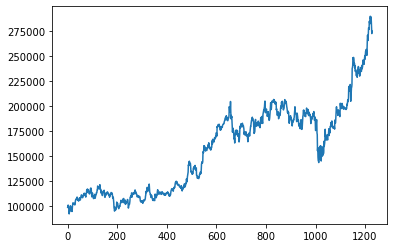

In [171]:
a,b = GreedyBandit(10,data.shape[0])
sns.lineplot(range(len(b)),b)

In [173]:
def EpsilonGreedy(n_arms, allowed_pulls, epsilon):
    amt = 100000
    pa = list()
    r = list()
    avg_rew = [0] * n_arms
    count = [0] * n_arms
    for i in range(allowed_pulls):
        if i < n_arms:
            arm = i
        else:
            if (random.randint(0, 100) * 0.01) < epsilon:
                arm = random.randint(0, n_arms - 1)
            else:
                arm = avg_rew.index(max(avg_rew))
        count[arm] += 1
        rew = data[i,arm]
        amt += (rew/100) * amt
        pa.append(amt)
        r.append(arm)
        avg_rew[arm] = update_average(avg_rew[arm], count[arm], rew)
    return dict(zip(avg_rew,count)) , pa,r

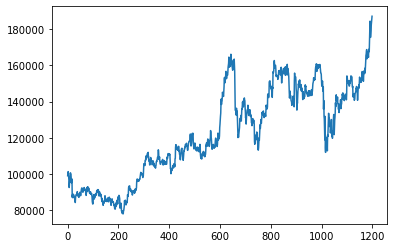

In [174]:
a,b,c = EpsilonGreedy(10,1200,0.15)
sns.lineplot(range(len(b)),b)

In [162]:
def DecayEpsilonGreedy(n_arms, allowed_pulls, epsilon):
    amt = 100000
    pa = list()
    avg_rew = [0] * n_arms
    count = [0] * n_arms
    for i in range(allowed_pulls):
        if i < n_arms:
            arm = i
        else:
            if (random.randint(0, 100) * 0.01) < epsilon:
                arm = random.randint(0, n_arms - 1)
            else:
                arm = avg_rew.index(max(avg_rew))
            epsilon *= 0.9
        count[arm] += 1
        rew = data[i,arm]
        amt += (rew/100) * amt
        pa.append(amt)
        avg_rew[arm] = update_average(avg_rew[arm], count[arm], rew)
    return dict(zip(avg_rew,count)),pa

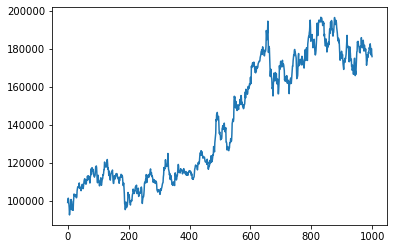

In [163]:
_,b = DecayEpsilonGreedy(10,1000,0.15)
sns.lineplot(range(len(b)),b)

In [164]:
def IncrementalUniform(n_arms, allowed_pulls):
    amt = 100000
    avg_rew = [0] * n_arms
    count = [0] * n_arms
    for i in range(allowed_pulls):
        arm = i % n_arms
        count[arm] += 1
        rew = data[i,arm]
        amt += (rew/100) * amt
        pa.append(amt)
        avg_rew[arm] = update_average(avg_rew[arm], count[arm], rew)
    return dict(zip(avg_rew,count)),pa

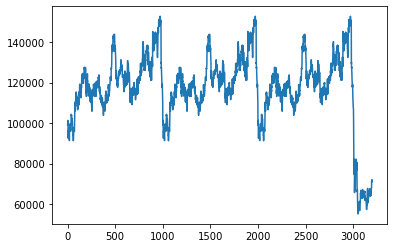

In [166]:
_,b = IncrementalUniform(10,1200)
sns.lineplot(range(len(b)),b)

In [121]:
def UniformConfidenceBound(n_arms, allowed_pulls):
    avg_rew = [0] * n_arms
    count = [0] * n_arms
    confidence = [0] * n_arms
    for i in range(allowed_pulls):
        if i < n_arms:
            arm = i
        else:
            arm = avg_rew.index(max(avg_rew))
        count[arm] += 1
        rew = data[i,arm]
        avg_rew[arm] = update_average(avg_rew[arm], count[arm], rew)
        confidence[arm] = update_confidence(avg_rew[arm], count[arm], rew)
    return dict(zip(avg_rew,count))

In [123]:
UniformConfidenceBound(10,1000)

ValueError: math domain error